## Exercício 1

**(a)(2pts)** Escreva um programa em Python que plote a convergência para a estimativa de $\pi$ para o Método de Monte Carlo e expansão de Leibniz. Mostre qual método tem a convergência mais rápida.

Text(0, 0.5, 'Estimativa do pi')

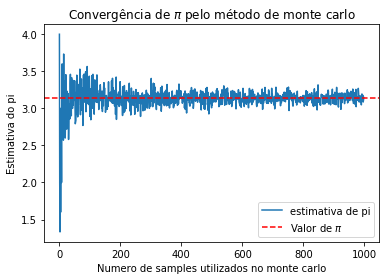

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def dist_cal (x1, y1 ,x2, y2):
    distance = math.sqrt((x1 - x2)**2 + (y1 -y2)**2)
    return distance

def create_random(n_val):
    point_list = []
    for x in range(n_val):
        x = random.randint(-10000,10000)
        y = random.randint(-10000,10000)
        
        point_list.append([x,y])
    return point_list

def MC_pi_estimate(inside, outside, n_samples): 
    
    points = create_random(n_samples)
    
    for i in points:
      if dist_cal(i[0],i[1], 0,0) <= 10000:
          inside = inside +1
    
    return (4*inside / (n_samples))

def leibniz_pi_estimate(n_samples):
    result = 0.0
    
    for n in range(n_samples):
        result += (-1.0)**n/(2.0*n+1.0)
        
    return 4*result

def convergence_series(n_samples, inside=None, outside=None):
    series_out = []
            
    for step in range(1, n_samples):
        if inside == None or outside == None:
            series_out.append(leibniz_pi_estimate(step))
        else:
            series_out.append(MC_pi_estimate(inside, outside, step))
    
    series_out_diff = [np.pi - series_out[i] for i in range(0, len(series_out))]
    return series_out, series_out_diff



# INPUTS
inside = 0
outside = 0
n_samples = 1000

# Método de Monte Carlo
mc_series_out, mc_series_out_diff = convergence_series(n_samples, inside, outside)
plt.title("Convergência de $\pi$ pelo método de monte carlo")
plt.plot(mc_series_out, label='estimativa de $\pi$')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor de $\pi$')
plt.legend(loc="lower right")
plt.xlabel("Numero de samples utilizados no monte carlo")
plt.ylabel("Estimativa do pi")



Text(0, 0.5, 'Estimativa do pi')

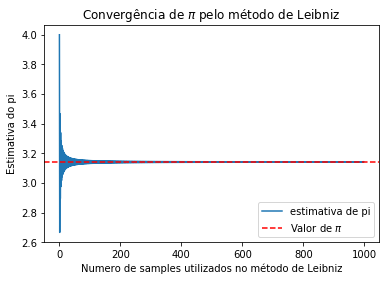

In [2]:
# Método de Leibniz
leibniz_series_out, leibniz_series_out_diff = convergence_series(n_samples)
plt.title("Convergência de $\pi$ pelo método de Leibniz")
plt.plot(leibniz_series_out, label='estimativa de $\pi$')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor de $\pi$')
plt.legend(loc="lower right")
plt.xlabel("Numero de samples utilizados no método de Leibniz")
plt.ylabel("Estimativa do pi")


In [3]:
print('Soma das diferenças: Método de Monte Carlo', np.sum(mc_series_out_diff))
print('Soma das diferenças: Método de Leibniz', np.sum(leibniz_series_out_diff))

Soma das diferenças: Método de Monte Carlo 8.504710647942074
Soma das diferenças: Método de Leibniz -0.5712965766709259


**(b)(4pts)** Escreva um programa que implemente a estimativa de $e$ como descrita abaixo (2pts). A explicação do método encontra-se no artigo [Estimating the value of $e$ by simulation](https://www.jstor.org/stable/pdf/2685243.pdf). Adicionalmente, implemente o algoritmo de estimação melhorado utilizando *variáveis antitéticas*, baseando-se na Seção 5 do artigo citado (2pts). Compare os resultados, em termos de convergência e variância.

Dados números aleatórios $U_i$ independentes e identicamente distribuídos $\sim \mathcal{U}(0,1)$, seja $S_n = \sum_{i=1}^{n} U_i$ e, seja $N$ o menor valor de $n$ para o qual $S_n > 1$, então temos que $E[N] \rightarrow e$. Quanto maior a quantidade de simulações, melhor a estimativa, como é usual em se tratando de métodos de Monte Carlo.

In [48]:
import numpy as np

# Estimativa do número de Euler segundo Russel (1991)
def russel_euler_number_estimate(n_samples):
    N_list = []
    for j in range(n_samples):
        entrou = 1
        sum_uniform = 0
        for N in range(100):  
            if sum_uniform < 1:
                uniform = np.random.uniform(0, 1, 1)
                sum_uniform = sum_uniform + uniform
            else:
                if entrou == 1:
                    N_list.append(N)
                    entrou = 0
                else:
                    continue
    
    return np.mean(N_list)
            
print(russel_euler_number_estimate(100))

2.6


In [49]:
# Estimativa do número de Euler segundo Russel (1991) utilizando variáveis antitéticas
def russel_anti_euler_number_estimate(n_samples):
    N_list_anti = []
    for j in range(n_samples):
        entrou = 1
        sum_uniform_tot = 0
        sum_uniform1 = 0
        sum_uniform2 = 0
        for N in range(100):  
            if sum_uniform1 < 1:
                uniform1 = np.random.uniform(0, 1, 1)
                uniform2 = 1 - uniform1
                sum_uniform1 = sum_uniform1 + uniform1
                sum_uniform2 = sum_uniform2 + uniform2

                sum_uniform_tot = (sum_uniform1 + sum_uniform2) / 2
            else:
                if entrou == 1:
                    N_list_anti.append(N)
                    entrou = 0
                else:
                    continue
    
    return np.mean(N_list_anti)

print(russel_anti_euler_number_estimate(100))

2.58


Text(0, 0.5, 'Estimativa de $e$')

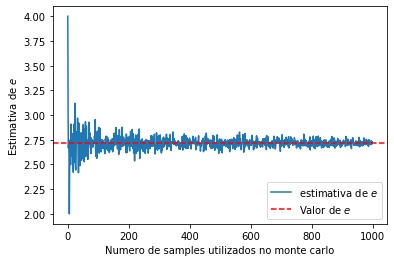

In [58]:
# Convergência das estimativa 1
convergence_list1 = []
convergence_list2 = []
for n_runs in range(1, 1000):
    convergence_list1.append(russel_euler_number_estimate(n_runs))
    convergence_list2.append(russel_anti_euler_number_estimate(n_runs))


Text(0, 0.5, 'Estimativa de $e$')

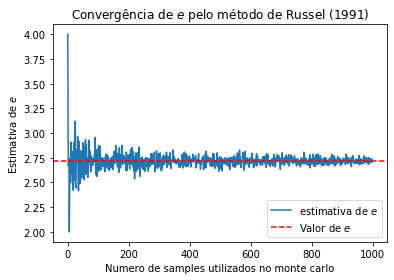

In [59]:
plt.title("Convergência de $e$ pelo método de Russel (1991)")
plt.plot(convergence_list1, label='estimativa de $e$')
plt.axhline(y=np.e, color='r', linestyle='--', label='Valor de $e$')
plt.legend(loc="lower right")
plt.xlabel("Numero de samples utilizados no monte carlo")
plt.ylabel("Estimativa de $e$")

Text(0, 0.5, 'Estimativa de $e$')

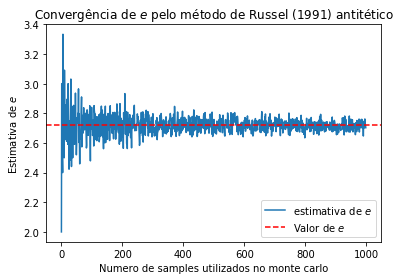

In [60]:
plt.title("Convergência de $e$ pelo método de Russel (1991) antitético")
plt.plot(convergence_list2, label='estimativa de $e$')
plt.axhline(y=np.e, color='r', linestyle='--', label='Valor de $e$')
plt.legend(loc="lower right")
plt.xlabel("Numero de samples utilizados no monte carlo")
plt.ylabel("Estimativa de $e$")

In [ ]:
print('Soma das diferenças: Método de Russel (19)', np.sum(mc_series_out_diff))
print('Soma das diferenças: Método de Leibniz', np.sum(leibniz_series_out_diff))

## Exercício 2

**(a)(1pt)** Qual o significado do segundo número obtido pela função `quad` acima? 



Segundo a documentação oficial do scipy, o segundo argumento retornado pela função "quad" é uma estimativa do erro absoluto da aproxição da função desejada.

**(b)(2pts)** Modifique a função $f(x)$ acima de modo que a sua integral seja normalizada, independente do valor de $a$.

In [ ]:
from scipy.integrate import quad
from pylab import rcParams
import numpy as np

def f(x,a): return np.exp(-a*x**2)

a = 2
quad(f,-np.inf,np.inf,args=a)